## Key Concepts of Decision Trees:

- Root Node: The topmost node of the tree, representing the entire dataset. This is where the first split happens based on the feature that best separates the data.

- Decision Node: Nodes where the dataset is split based on certain features. Each decision node asks a question or makes a decision based on the feature values.

- Leaf Node: The terminal nodes of the tree, which represent the final decision or output (a class label for classification tasks or a value for regression tasks).

- Splitting: The process of dividing a node into two or more sub-nodes based on certain features. In classification, splits are typically chosen to maximize the separation of different classes.

- Pruning: The process of removing branches or nodes that have little predictive power to prevent overfitting and improve the model’s performance on new data.

## Impurity: 
    A measure of how mixed the classes are in a node. Common measures of impurity include:

- Gini Impurity: Used in classification tasks to measure how often a randomly chosen element would be incorrectly labeled.

- Entropy (used in Information Gain): Used to measure the amount of disorder or randomness in the dataset.

- Mean Squared Error (MSE): Used in regression tasks to measure the variance between actual values and predicted values.

# How Decision Trees Work:

### For Classification:

The algorithm starts at the root node and splits the data based on a feature that provides the most information gain or reduces the most impurity (e.g., Gini or entropy).
The process continues recursively for each subset of data at each node.
Finally, the leaf nodes represent the predicted class labels.


### For Regression:

Similar to classification, but instead of class labels, the tree tries to predict continuous values. The splits minimize the variance (using measures like mean squared error) of the predictions within the nodes.

# Decision Tree)

In [85]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [5]:
df = pd.read_csv('horse.csv')

In [6]:
df.shape

(299, 28)

In [4]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


## 1.Build a model to classify the outcome of the horse

In [8]:
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [11]:
target = df[[ 'outcome']]
features = df.drop(columns= 'outcome')

In [12]:
target.head()

,outcome
0,died
1,euthanized
2,lived
3,died
4,died


In [13]:
features.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,no,4300,0,0,no


In [14]:
features.shape

(299, 27)

In [15]:
features.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [30]:
num_col = [i for i in features.columns if features[i].dtype!='O']
cat_col = [i for i in features.columns if features[i].dtype=='O']

In [31]:
print('Numerical columns :','\n',num_col)
print('\n')
print('Catagerical columns :','\n',cat_col)

Numerical columns : 
 ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


Catagerical columns : 
 ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data']


In [32]:
features[cat_col].isnull().sum()

surgery                    0
age                        0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
abdomo_appearance        165
surgical_lesion            0
cp_data                    0
dtype: int64

In [33]:
features[num_col].isnull().sum()

hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
nasogastric_reflux_ph    246
packed_cell_volume        29
total_protein             33
abdomo_protein           198
lesion_1                   0
lesion_2                   0
lesion_3                   0
dtype: int64

In [34]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [59]:
features[cat_col]

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,no,adult,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,NaN,no,no
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,cloudy,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,NaN,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,serosanguious,yes,yes
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,distend_large,NaN,no,no
295,no,adult,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,absent,distend_small,serosanguious,yes,yes
296,yes,adult,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,decreased,distend_large,NaN,yes,no
297,yes,adult,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,absent,distend_small,serosanguious,yes,yes


In [61]:
ord_enc.fit_transform(features[cat_col])

array([[ 0.,  0.,  1., ..., nan,  0.,  0.],
       [ 1.,  0., nan, ...,  1.,  0.,  0.],
       [ 0.,  0.,  2., ..., nan,  0.,  1.],
       ...,
       [ 1.,  0.,  0., ..., nan,  1.,  0.],
       [ 1.,  0.,  1., ...,  2.,  1.,  1.],
       [ 1.,  0., nan, ...,  0.,  0.,  0.]])

In [63]:
pd.DataFrame(ord_enc.fit_transform(features[cat_col]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,1.0,3.0,NaN,2.0,2.0,0.0,2.0,NaN,NaN,1.0,0.0,NaN,0.0,0.0
1,1.0,0.0,NaN,NaN,4.0,1.0,3.0,0.0,3.0,NaN,NaN,0.0,4.0,1.0,0.0,0.0
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,NaN,NaN,3.0,3.0,NaN,0.0,1.0
3,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0
4,0.0,0.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,0.0,0.0,NaN,4.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
295,0.0,0.0,1.0,1.0,4.0,2.0,4.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,1.0
296,1.0,0.0,0.0,3.0,4.0,1.0,4.0,0.0,0.0,2.0,2.0,1.0,0.0,NaN,1.0,0.0
297,1.0,0.0,1.0,3.0,5.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,1.0


In [35]:
ord_enc = OrdinalEncoder()
df1 = pd.DataFrame(ord_enc.fit_transform(features[cat_col]),columns=cat_col)
df1.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,0.0,0.0,1.0,3.0,NaN,2.0,2.0,0.0,2.0,NaN,NaN,1.0,0.0,NaN,0.0,0.0
1,1.0,0.0,NaN,NaN,4.0,1.0,3.0,0.0,3.0,NaN,NaN,0.0,4.0,1.0,0.0,0.0
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,NaN,NaN,3.0,3.0,NaN,0.0,1.0
3,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0
4,0.0,0.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [38]:
simple = SimpleImputer(missing_values=np.nan,strategy='most_frequent')   
simple                          # Give anything mean,median or mode in most_frequent

SimpleImputer(strategy='most_frequent')

In [44]:
df2 = pd.DataFrame(simple.fit_transform(df1),columns=df1.columns)
df2.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,0.0,1.0
3,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
4,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0


In [48]:
#df.isnull().sum()
#df1.isnull().sum()
df2.isnull().sum()

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
surgical_lesion          0
cp_data                  0
dtype: int64

In [54]:
simple1 = SimpleImputer(missing_values=np.nan,strategy='median')

In [58]:
df3 = pd.DataFrame(simple1.fit_transform(features[num_col]),columns=num_col)
df3.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101.0,38.5,66.0,28.0,5.0,45.0,8.4,2.3,11300.0,0.0,0.0
1,534817.0,39.2,88.0,20.0,5.0,50.0,85.0,2.0,2208.0,0.0,0.0
2,530334.0,38.3,40.0,24.0,5.0,33.0,6.7,2.3,0.0,0.0,0.0
3,5290409.0,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208.0,0.0,0.0
4,530255.0,37.3,104.0,35.0,5.0,74.0,7.4,2.3,4300.0,0.0,0.0


In [64]:
df3.isnull().sum()

hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

In [65]:
std_sca = StandardScaler()
df4 = pd.DataFrame(simple1.fit_transform(features[num_col]),columns=num_col)
df4.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101.0,38.5,66.0,28.0,5.0,45.0,8.4,2.3,11300.0,0.0,0.0
1,534817.0,39.2,88.0,20.0,5.0,50.0,85.0,2.0,2208.0,0.0,0.0
2,530334.0,38.3,40.0,24.0,5.0,33.0,6.7,2.3,0.0,0.0,0.0
3,5290409.0,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208.0,0.0,0.0
4,530255.0,37.3,104.0,35.0,5.0,74.0,7.4,2.3,4300.0,0.0,0.0


In [66]:
features_new = pd.concat([df2,df3],axis=1)
features_new

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,530101.0,38.5,66.0,28.0,5.0,45.0,8.4,2.3,11300.0,0.0,0.0
1,1.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0,534817.0,39.2,88.0,20.0,5.0,50.0,85.0,2.0,2208.0,0.0,0.0
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,0.0,1.0,530334.0,38.3,40.0,24.0,5.0,33.0,6.7,2.3,0.0,0.0,0.0
3,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,5290409.0,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208.0,0.0,0.0
4,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,530255.0,37.3,104.0,35.0,5.0,74.0,7.4,2.3,4300.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,533886.0,38.2,120.0,70.0,5.0,55.0,65.0,2.3,3205.0,0.0,0.0
295,0.0,0.0,1.0,1.0,4.0,2.0,4.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,1.0,527702.0,37.2,72.0,24.0,5.0,44.0,7.5,3.3,2208.0,0.0,0.0
296,1.0,0.0,0.0,3.0,4.0,1.0,4.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,529386.0,37.5,72.0,30.0,5.0,60.0,6.8,2.3,3205.0,0.0,0.0
297,1.0,0.0,1.0,3.0,5.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,1.0,530612.0,36.5,100.0,24.0,5.0,50.0,6.0,3.4,2208.0,0.0,0.0


In [68]:
def outlier_capping(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    df[column] = df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(include = ['float','int']).columns:
    outlier_capping(features_new,col)

In [69]:
features_new.shape

(299, 27)

In [70]:
x_train,x_test,y_train,y_test = train_test_split(features_new,target,train_size=0.75,random_state=100)

In [103]:
dec_tree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=10)

In [104]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [105]:
y_pred = dec_tree.predict(x_test)

In [106]:
accuracy_score(y_test,y_pred)

0.7066666666666667

In [107]:
target.outcome.unique()

array(['died', 'euthanized', 'lived'], dtype=object)

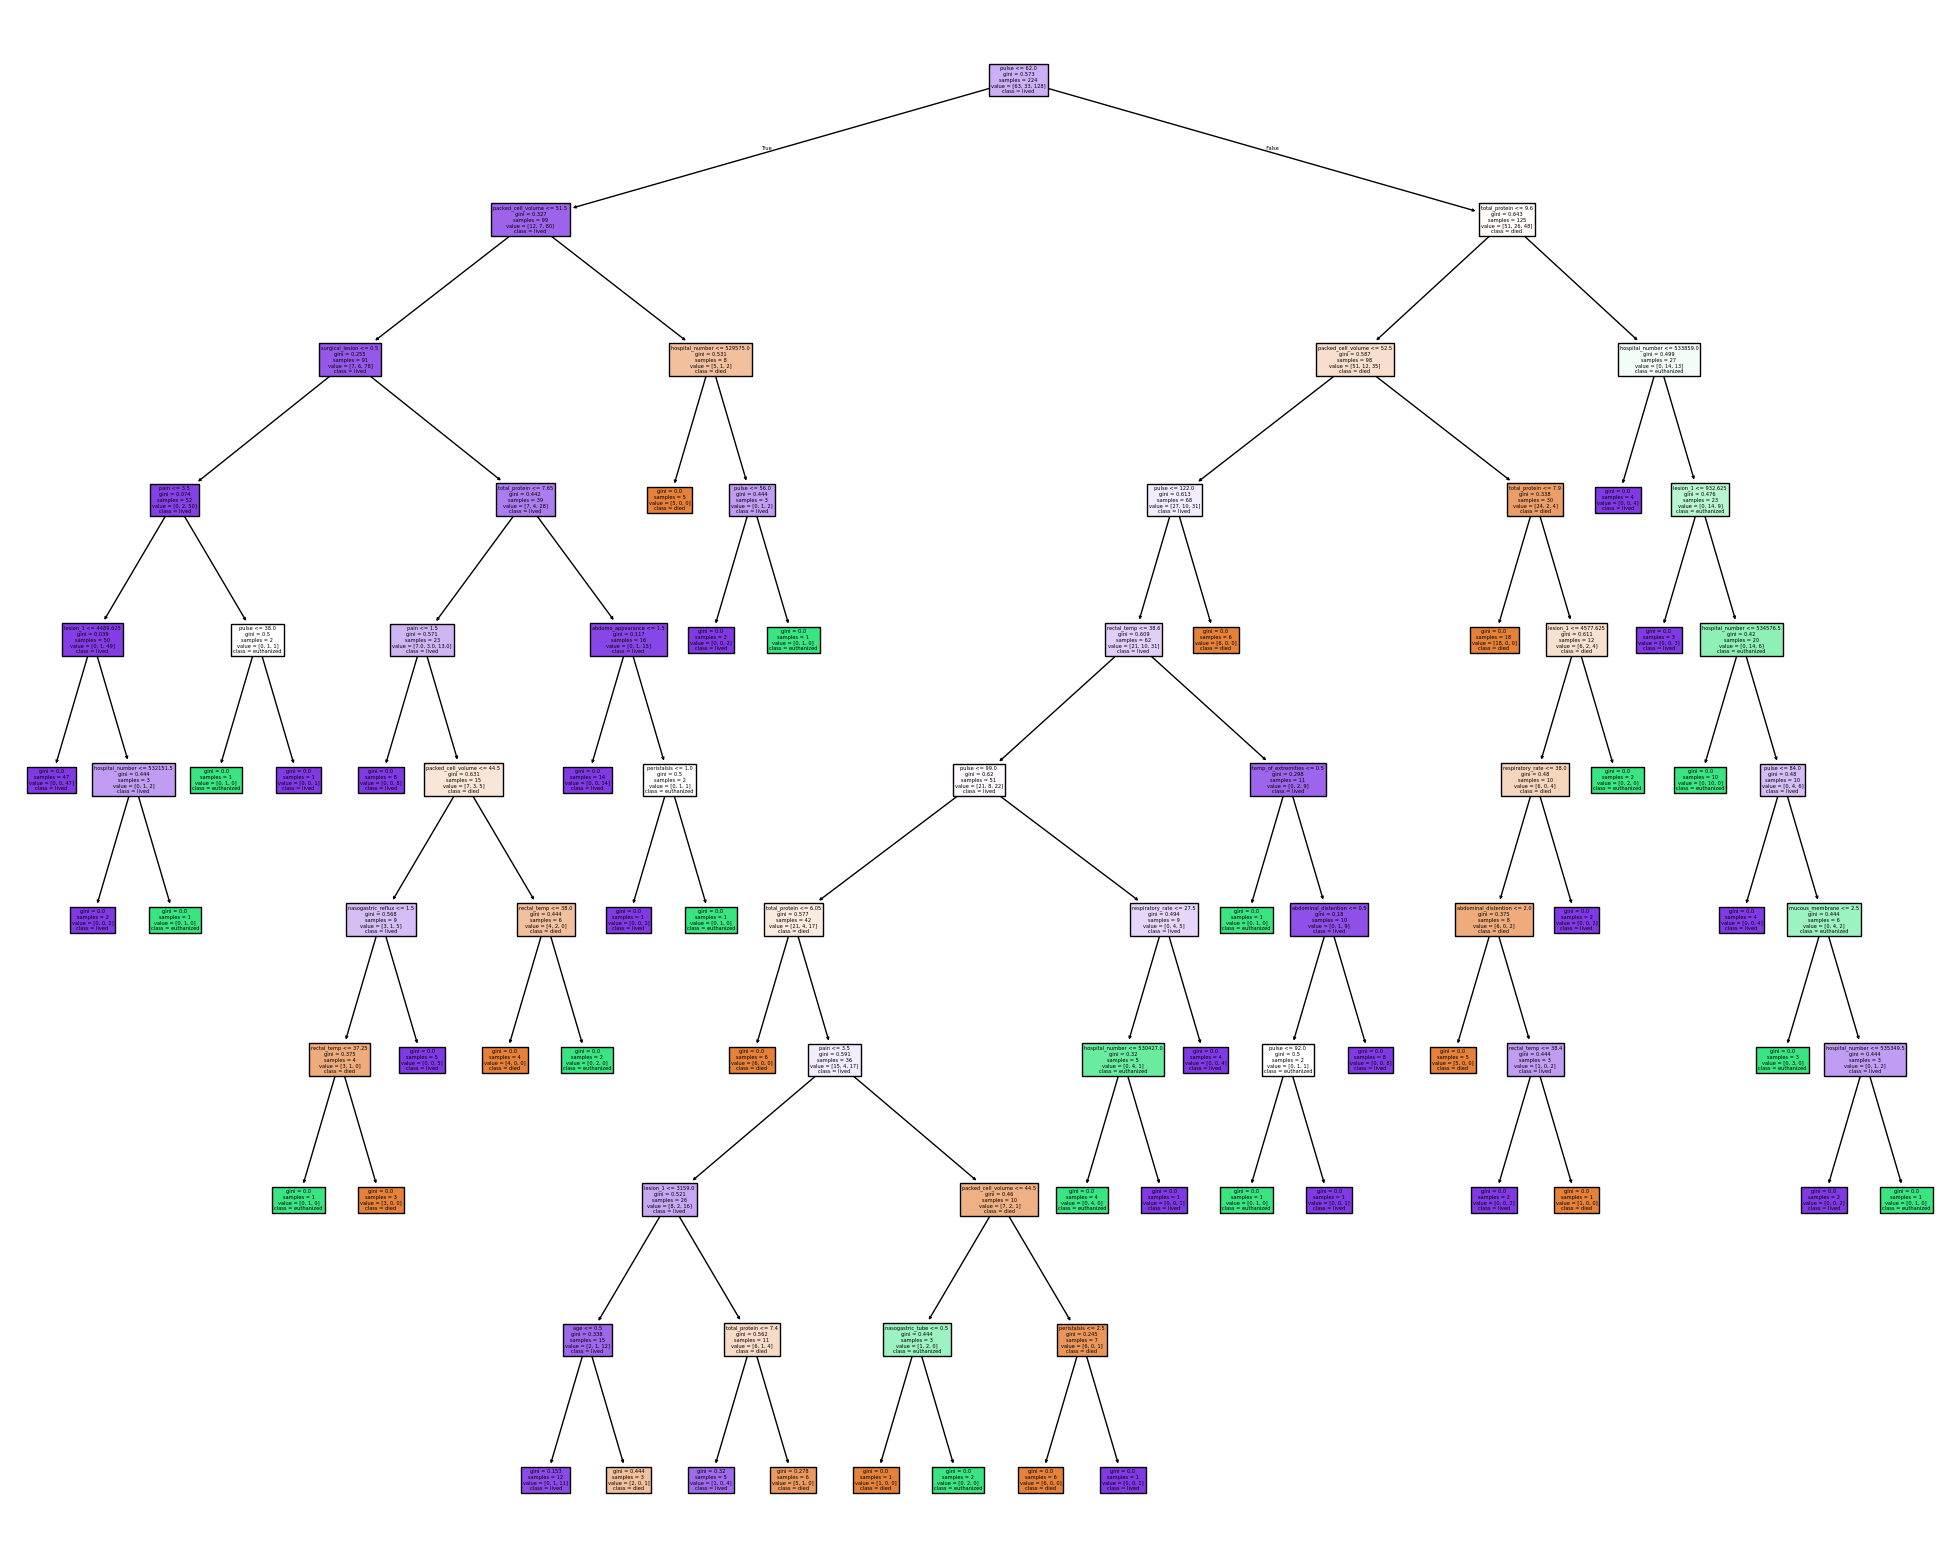

In [116]:
plt.figure(figsize=(25,20))
plot_tree(dec_tree,feature_names=list(features_new),filled=True,max_depth=10,class_names=list(target.outcome.unique()))
plt.show()

# Recursive Features Elimination

In [117]:
from sklearn.feature_selection import RFE

In [118]:
features_new.shape

(299, 27)

In [119]:
rfe = RFE(dec_tree,n_features_to_select=10)

In [120]:
rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier(max_depth=10), n_features_to_select=10)

In [121]:
rfe.ranking_

array([17, 14, 13,  1,  1,  7,  1,  6,  2,  5,  3,  9, 10, 18,  4, 11,  1,
        1,  1,  1, 12,  1,  1,  8,  1, 15, 16])

In [129]:
a = rfe.get_support()
a

array([False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False])

In [126]:
b = features_new.columns
b

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',
       'cp_data', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume',
       'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')

In [127]:
b[a]          # Masking

Index(['peripheral_pulse', 'mucous_membrane', 'pain', 'hospital_number',
       'rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume',
       'total_protein', 'lesion_1'],
      dtype='object')

# Naive Bays

In [130]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

## Bernomial NB

In [131]:
bern = BernoulliNB()

In [132]:
bern.fit(x_train,y_train)

C:\Users\91872\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [135]:
y_pred1 = bern.predict(x_test)

In [137]:
accuracy_score(y_test,y_pred1)

0.5733333333333334

## GaussianNB

In [138]:
gaus = GaussianNB()

In [139]:
gaus.fit(x_train,y_train)

C:\Users\91872\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [140]:
y_pred2 = gaus.predict(x_test)

In [141]:
accuracy_score(y_test,y_pred2)

0.5333333333333333